<a href="https://colab.research.google.com/github/KaioHenrique21/Curso-ML/blob/main/Sistema_de_recomenda%C3%A7%C3%A3o_por_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow keras opencv-python matplotlib scikit-learn

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input
from tensorflow.keras.utils import load_img, img_to_array

import numpy as np
import matplotlib.pyplot as plt
import os
import random


In [3]:
import os

base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

categories = ['carro', 'cerveja', 'celular', 'notebook']

# Criando pastas
for dir_path in [train_dir, validation_dir]:
    os.makedirs(dir_path, exist_ok=True)
    for category in categories:
        os.makedirs(os.path.join(dir_path, category), exist_ok=True)

print("Estrutura de pastas criada com sucesso!")


Estrutura de pastas criada com sucesso!


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 20 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [7]:
#Criando um modelo CNN(Convolutional Neural Network)
model = Sequential([
    Input(shape=(150, 150, 3)),  # Define a entrada aqui explicitamente
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.1500 - loss: 1.4195 - val_accuracy: 0.2500 - val_loss: 1.8084
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3500 - loss: 1.7874 - val_accuracy: 0.3000 - val_loss: 1.4256
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3000 - loss: 1.4568 - val_accuracy: 0.4500 - val_loss: 1.3632
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3500 - loss: 1.3761 - val_accuracy: 0.4500 - val_loss: 1.3288
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2500 - loss: 1.3468 - val_accuracy: 0.7000 - val_loss: 1.3156
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4500 - loss: 1.2913 - val_accuracy: 0.7500 - val_loss: 1.2810
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5000 - loss: 1.2580 - val_accuracy: 0.7500 - val_loss: 1.2375
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4500 - loss: 1.2494 - val_accuracy: 0.6500 - val_loss: 1.1854
Epoch 9/10
1/1 ━━━━━━━━━━━━

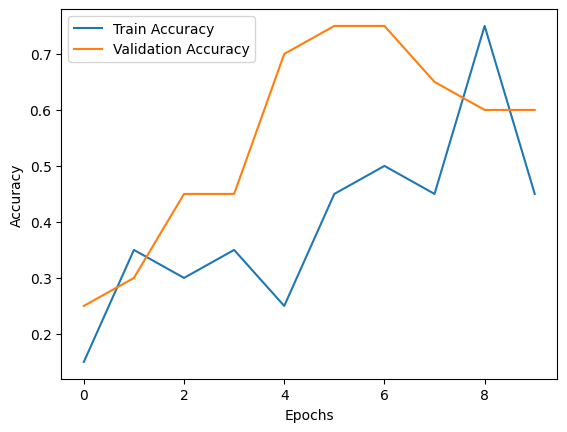

In [8]:
#Treinando o modelo
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [13]:
#Testando o sistema
def predict_image(image_path, model, class_indices):
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    class_names = list(class_indices.keys())
    print(f"Predicted Class: {class_names[predicted_class]}")

In [14]:
predict_image('/content/cervejaTeste.jpg', model, train_generator.class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Class: cerveja


In [20]:
#Recomendação por imagens

def recommend_images(image_path, model, class_indices, num_recommendations=3):
    # 1. Preveja a classe da imagem de entrada
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class_idx = np.argmax(prediction)
    class_names = list(class_indices.keys())
    predicted_class_name = class_names[predicted_class_idx]

    print(f"Predicted Class: {predicted_class_name}")

    # 2. Caminho para o diretório da classe prevista
    class_dir = os.path.join('dataset/train', predicted_class_name)

    # 3. Pegue imagens da mesma classe para recomendação(somente arquivos de imagem)
    image_files = [
      f for f in os.listdir(class_dir)
      if os.path.isfile(os.path.join(class_dir, f))
    ]

    recommended_images = random.sample(image_files, num_recommendations)

    # 4. Exiba as imagens recomendadas
    print("\nRecommended Images:")
    plt.figure(figsize=(15, 5))
    for i, img_file in enumerate(recommended_images):
        img_path = os.path.join(class_dir, img_file)
        img = load_img(img_path, target_size=(150, 150))

        plt.subplot(1, num_recommendations, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Recommended {i+1}")

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Class: cerveja

Recommended Images:


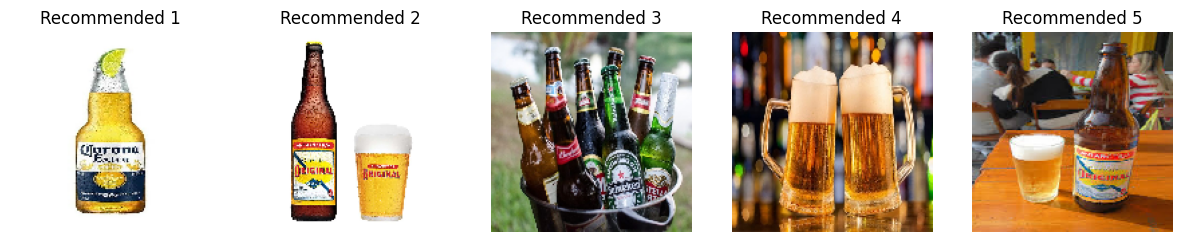

In [21]:
#Chama a função para recomendação
recommend_images('/content/cervejaTeste.jpg', model, train_generator.class_indices, num_recommendations=5)